<a href="https://colab.research.google.com/github/raz0208/Advance-Quantitative-Research-Project/blob/main/Task3/Credit_Risk_Analysis_and_Modeling_PD_and_EL_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3: Credit Risk Analysis and Credit Risk Modeling**
### Predicting Probability of Default (PD) and Expected Loss (EL) for retail banking personal loans.

## **Step 1: data prepration**

In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
# Load and read dataset
df = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


Data Description:
Shape of the dataset: (10000, 8)

Data Types:
customer_id         int64
credit_lines        int64
loan_amt          float64
total_debt        float64
income            float64
years_employed      int64
fico_score          int64
default             int64
dtype: object

Summary Statistics:
        customer_id  credit_lines      loan_amt    total_debt         income  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   4.974577e+06      1.461200   4159.677034   8718.916797   70039.901401   
std    2.293890e+06      1.743846   1421.399078   6627.164762   20072.214143   
min    1.000324e+06      0.000000     46.783973     31.652732    1000.000000   
25%    2.977661e+06      0.000000   3154.235371   4199.836020   56539.867903   
50%    4.989502e+06      1.000000   4052.377228   6732.407217   70085.826330   
75%    6.967210e+06      2.000000   5052.898103  11272.263740   83429.166133   
max    8.999789e+06      5.000000  10750.677810  4368

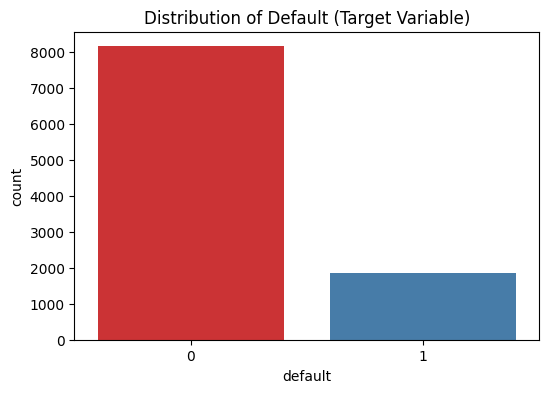

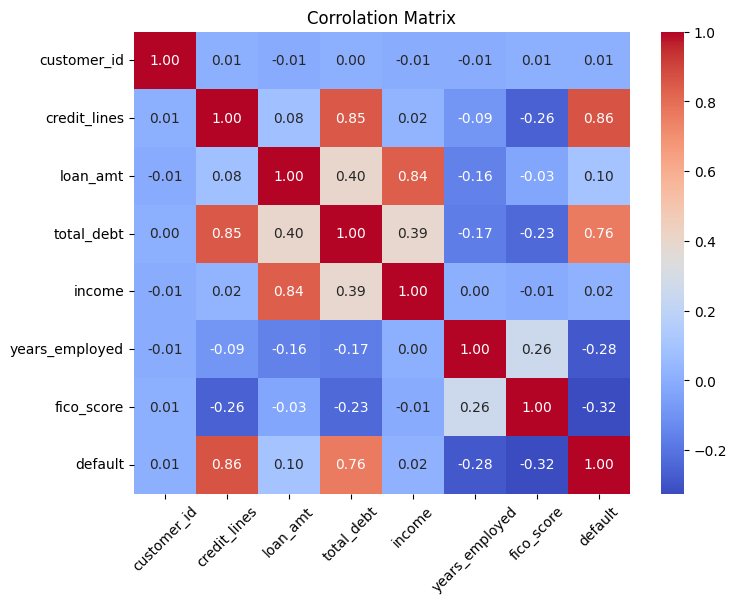

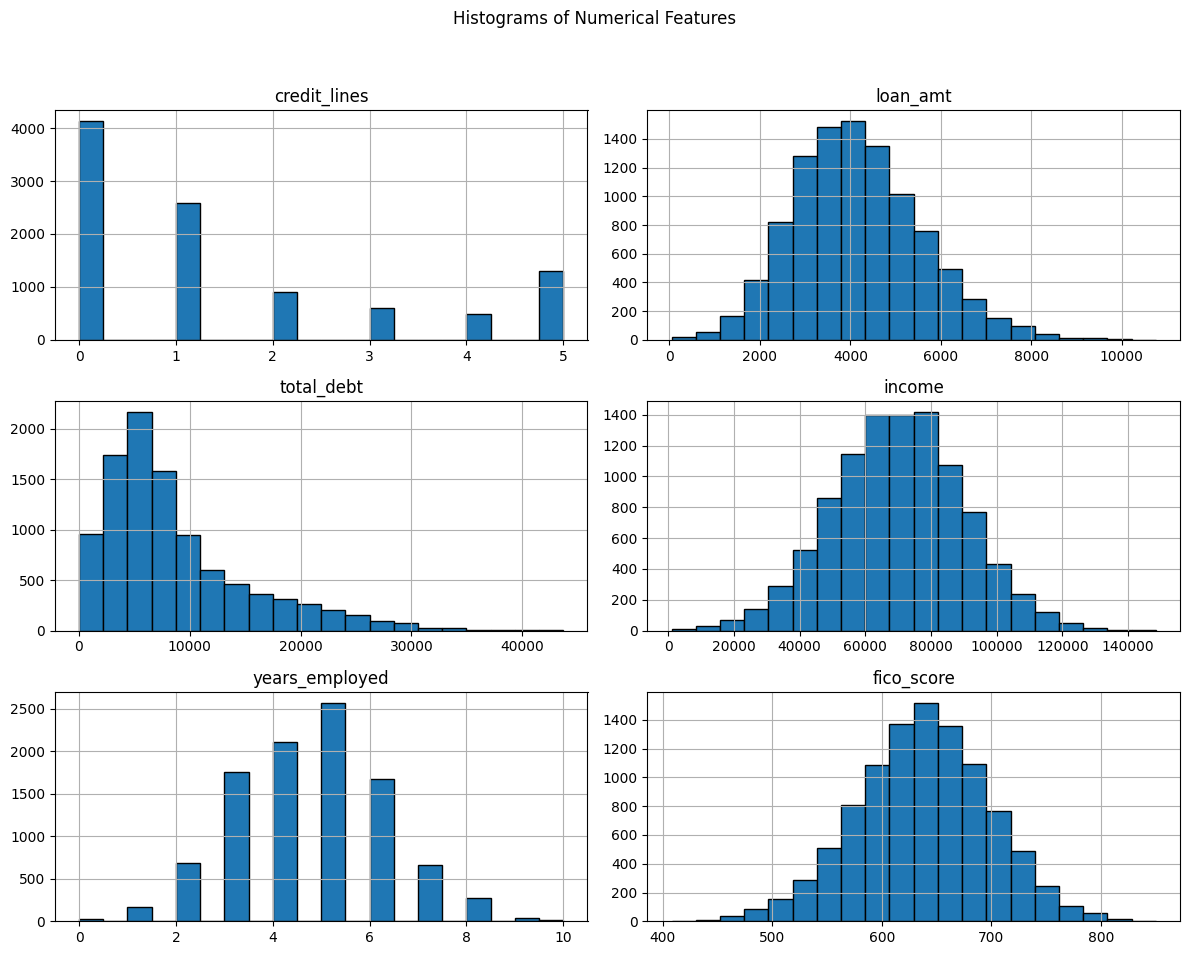

In [27]:
# Function to data understanding
def data_understanding(df):
  print("Data Description:")
  print(f"Shape of the dataset: {df.shape}")
  print("\nData Types:")
  print(df.dtypes)
  print("\nSummary Statistics:")
  print(df.describe())

  print("\nData Quality Verification:")
  # Check for missing values
  missing_val = df.isnull().sum()
  print(missing_val)

  # Check for duplication
  duplicates = df.duplicated().sum()
  print(f"\nNumber of duplicate rows: {duplicates}")
  print("\n")

  ## Data Exploration

  # Target variable distribution
  plt.figure(figsize=(6, 4))
  sns.countplot(x='default', data=df, palette ='Set1')
  plt.title('Distribution of Default (Target Variable)')
  plt.show()
  print("\n")

  # Corrolation matrix
  plt.figure(figsize=(8, 6))
  corrolation = df.corr()
  sns.heatmap(corrolation, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Corrolation Matrix')
  plt.xticks(rotation=45)
  plt.show()
  print("\n")

  # Histogram for Numerical Variables
  numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['customer_id', 'default'])
  df[numerical_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')
  plt.suptitle('Histograms of Numerical Features')
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()
  print("\n")


# Remove "_outstanding" word from columns name where exists
for col in df.columns:
    if "_outstanding" in col:
        df.rename(columns={col: col.replace("_outstanding", "")}, inplace=True)

# Call the data_understanding function
data_understanding(df)